# Load All API

In [1]:
import nltk
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import numpy as np
import scipy.stats.stats as st
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.wsd import lesk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#from stemming.porter2 import stem
from nltk import PorterStemmer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from string import digits
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import csv

import re
from nltk import word_tokenize
import string
#!pip install gensim
import gensim.models as md
from gensim.models.phrases import Phrases, Phraser
import os
from sklearn.datasets import fetch_20newsgroups
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('reuters')
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize


# Authosentecat to Google Drive

In [2]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

You are using pip version 10.0.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

In [ ]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [ ]:
#https://colab.research.google.com/notebook#fileId=1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q&scrollTo=c99EvWo1s9-x
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!ls

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
!mkdir -p drive_PH
!google-drive-ocamlfuse drive_PH

In [ ]:
!ls 'drive_PH/Colab Notebooks'

# Start My Code

## Settings **Codes**

In [3]:
def read_cvs_by_pands(path_database,file_databbase,index_col, header):
    return pd.read_csv(path_database+file_databbase,index_col=index_col,header=header,sep=',')

In [4]:
def txt_pragraphs(str):
    pragraphs = str.split("\n\n")
    return pragraphs

In [5]:
def read_text_from_database(path_database,file_databbase):
    queue_paragraph=[]
    #f = open(sys.argv[1], 'rt')
    outfile = open(path_database+file_databbase,'rt')
    try:
                
        reader=csv.reader(outfile)
        for row in reader:
            queue_paragraph.append(row)
            #print (row)
    finally:
        print ("row")
        outfile.close()
        
    return queue_paragraph

In [6]:
'''
Write Excell sheet
'''
def save_file_to_database(data_rows,path_database,file_databbase,header_list):#header_list=['index','text']
    outfile = open(path_database+file_databbase,'w')
    writer=csv.writer(outfile)
    #header_list=['uuid','paragraph','doc_id']
    i=0
    for line in data_rows:
        row=[i,line]#,'paragraph no.'+str(i)]
        if i==0:
            
            writer.writerow(header_list)
            writer.writerow(row)
        else:
            #print('ff')
            writer.writerow(row)
        i+= 1
        #outfile.close()

In [7]:
def pragraph_to_setnences(str):
    return sent_tokenize(str)

In [8]:
import csv   
def add_row(row,path_database,file_name):
    #fields=['first','second','third']
    with open(path_database+file_name, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(row)
        print("printed")

In [9]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3+height,
                '%d' % int(height+.5),
                ha='center', va='bottom')
    

## pathes and files

In [10]:
#path_database='./drive_PH/Colab Notebooks/' 
path_database='./'
path_stop_word=path_database+'input/stopwords/'

pragraph_index='pragraph_index_20.csv'
Sentences='Sentences_20.csv'
Sentences_not_stops='Sentences_not_stops_20.csv'
lesk='lesk_20.csv'

pragraph_index_reuters='pragraph_index_reuters.csv'
Sentences_reuters='Sentences_reuters.csv'
Sentences_not_stops_reuters='Sentences_not_stops_reuters.csv'
lesk_reuters='lesk_reuters.csv'


#Steps

##Load 20newsgroups dataset

In [11]:
#@title Load 20newsgroups dataset
#http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [12]:
documents[0]
dataset.filenames

array(['/home/fsg/scikit_learn_data/20news_home/20news-bydate-train/talk.politics.mideast/76141',
       '/home/fsg/scikit_learn_data/20news_home/20news-bydate-train/alt.atheism/53281',
       '/home/fsg/scikit_learn_data/20news_home/20news-bydate-train/talk.politics.mideast/76350',
       ...,
       '/home/fsg/scikit_learn_data/20news_home/20news-bydate-train/rec.sport.baseball/105105',
       '/home/fsg/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51575',
       '/home/fsg/scikit_learn_data/20news_home/20news-bydate-train/rec.sport.baseball/104908'],
      dtype='<U90')

In [13]:
#save_file_to_database(documents,path_database,pragraph_index,header_list)

In [14]:
header_list=['index','text']
#save_file_to_database(documents,'/',pragraph_index,header_list)

## Reuters

In [15]:
from nltk.corpus import reuters 
 
def all_courps_list():
    # List of documents
    documents = reuters.fileids()
    
    categories = reuters.categories();
   
    index=0
    #paragraph_list=[]
    for i in range (len(categories)):
        category_docs = reuters.fileids(categories[i]);
        for x in range (len(category_docs)):
            row=[]
            document_id = category_docs[x]
            row.append(index)
            doc=reuters.raw(document_id)
            row.append(doc)
            add_row(row,path_database,pragraph_index_reuters)
            index =+1
            
        

In [16]:
from nltk.corpus import reuters 
def sub_courps_list():
    # List of documents
    documents = reuters.fileids()
   
    categories = reuters.categories();
    index=0
    category_docs = reuters.fileids('grain');
    for x in range (len(category_docs)):
            row=[]
            document_id = category_docs[x]
            row.append(index)
            doc=reuters.raw(document_id)
            row.append(doc)
            add_row(row,path_database,'pragraph_index_reuters.csv')
            print(index)
            print(x)
            index +=1
            #print(row)
            #print("------------")
            
            

In [17]:
from nltk.corpus import reuters 
def sub_courps_list_grain():
    documents = reuters.fileids('grain')
    
    data = [d for d in documents]
   
    
    for s in range(len(data)):
        r=[]
        doc=reuters.raw(data[s])
        r.append(s)
        r.append(doc)
        add_row(r,path_database,'pragraph_index_reuters.csv')
        print(s)

In [18]:
header_list=['index','text']
add_row(header_list,path_database,'pragraph_index_reuters.csv')

printed


In [19]:
sub_courps_list_grain()

printed
0
printed
1
printed
2
printed
3
printed
4
printed
5
printed
6
printed
7
printed
8
printed
9
printed
10
printed
11
printed
12
printed
13
printed
14
printed
15
printed
16
printed
17
printed
18
printed
19
printed
20
printed
21
printed
22
printed
23
printed
24
printed
25
printed
26
printed
27
printed
28
printed
29
printed
30
printed
31
printed
32
printed
33
printed
34
printed
35
printed
36
printed
37
printed
38
printed
39
printed
40
printed
41
printed
42
printed
43
printed
44
printed
45
printed
46
printed
47
printed
48
printed
49
printed
50
printed
51
printed
52
printed
53
printed
54
printed
55
printed
56
printed
57
printed
58
printed
59
printed
60
printed
61
printed
62
printed
63
printed
64
printed
65
printed
66
printed
67
printed
68
printed
69
printed
70
printed
71
printed
72
printed
73
printed
74
printed
75
printed
76
printed
77
printed
78
printed
79
printed
80
printed
81
printed
82
printed
83
printed
84
printed
85
printed
86
printed
87
printed
88
printed
89
printed
90
printed
9

##nytimes_news_articles.

In [20]:
import pandas as pd
def courps_to_CSV_docs():
    #Reading the news articles file
    nyTimesFile = open('./nytimes_news_articles.txt', encoding='latin-1')
    nyTimesFile.seek(0)
    nyTimesV1 = nyTimesFile.readlines()
    nyTimesTemp = []
    nyTimesURL = []

    for i in range(0, len(nyTimesV1)-1):
        if re.findall('URL', nyTimesV1[i]) == []:
            sent = sent + nyTimesV1[i]
            if (re.findall('URL', nyTimesV1[i+1]) != []) and (i+1 < len(nyTimesV1)):
                nyTimesTemp.append(sent.strip())
        else:
            sent = ''
            nyTimesURL.append(nyTimesV1[i])

    for i in range(0, len(nyTimesTemp)):
        nyTimesTemp[i] = nyTimesTemp[i]+'articleID'+str(i)
    print(len(nyTimesTemp))
    header_list=['index','text']
    save_file_to_database(nyTimesTemp,path_database,pragraph_index,header_list)
    '''for i in range(1):
        print(i,"============================================")
        print("============================================")'''
    #nytimes = preProcessor(nyTimesTemp)
    print("============================================")
    #print(nytimes)

In [21]:
#courps_to_CSV_docs()

##Load paragraphs csv file

In [22]:
paragraphs=read_cvs_by_pands(path_database,'pragraph_index_reuters.csv',0,0)
paragraphs

,text
index,
0,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
1,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Tha...
2,SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE F...
3,JAPAN MINISTRY SAYS OPEN FARM TRADE WOULD HIT ...
4,ZAMBIA DOES NOT PLAN RETAIL MAIZE PRICE HIKE ...
5,FURTHER ARGENTINE COARSE GRAIN LOSSES FEARED ...
6,HONDURAS SEEKING PL-480 BULK WHEAT APRIL 13 H...
7,BRAZIL GRAIN HARVEST FACES STORAGE PROBLEMS S...
8,TUNISIA EXPECTED TO TENDER FOR FRENCH WHEAT T...


In [23]:
crs=open(path_database+pragraph_index_reuters,"r")
f=crs.read()
f2=f.replace('\n','')
lists=f.split(",")
len(lists)
lists[10]
for l in range(len(lists)):
    #if l%2==0:
    print(l,'\n',lists[l])
w=open(path_database+'pragraph_index_reuters2.csv',"w")
w.write(f2)
w.close
    

0 
 index
1 
 text
0
2 
 CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS A survey of 19 provinces and seven cities showed vermin consume between seven and 12 pct of China s grain stocks the China Daily said. It also said that each year 1.575 mln tonnes or 25 pct of China s fruit output are left to rot and 2.1 mln tonnes or up to 30 pct of its vegetables. The paper blamed the waste on inadequate storage and bad preservation methods. It said the government had launched a national programme to reduce waste calling for improved technology in storage and preservation and greater production of additives. The paper gave no further details
1
3 
 THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Thailand s trade deficit widened to 4.5 billion baht in the first quarter of 1987 from 2.1 billion a year ago the Business Economics Department said. It said Janunary/March imports rose to 65.1 billion baht from 58.7 billion. Thailand s improved business climate this year resulted in a 27 pct increase in imp

520 
 EC APPROVES 25 000 TONNES OF BARLEY EXPORTS  The European Community authorised the  export of 25 000 tonnes of barley yesterday bringing the  cumulative total at weekly tenders since the series started  last June to 3.33 mln tonnes close to the 3.37 mln under  licence in the same year ago period traders said.  All bids for wheat were rejected. However the total to  date of 5.06 mln tonnes is still substantially more than the  3.03 mln under licence a year ago. The 80 000 tonnes of French  maize granted for export moved the total to 135 000 tonnes  since the tender opened in February this year. There were no  facilities for maize in the previous weekly grain export  series.    52
519
521 
 U.S. GRAIN ANALYSTS SEE LOWER CORN SOY PLANTING  Grain analysts surveyed by the American  Soybean Association ASA projected acreage this year at 59.1  mln acres of soybeans and 64.7 mln acres of corn.  In 1986 farmers planted 61.5 mln acres of soybeans and  76.7 mln acres of corn according to th

985 
  vs 1
986 
 877
  last month. Stocks on May 31
987 
  1986
988 
  at 1
989 
 905
990 
  vs 1
991 
 905 last
  month.
      Exports in 1986/87 season at 1
992 
 025
993 
  vs 1
994 
 025 last month.
  1985/86 season at 915
995 
  vs 915 last month.
      Domestic use in 1986/87 at 1
996 
 134
997 
  vs 1
998 
 105 last month.
  1985/86 at 1
999 
 045
1000 
  vs 1
1001 
 045 last month.
      Cotton -- in mln 480 lb bales - Stocks
1002 
  July 31
1003 
  1987
1004 
  at
  5.40
1005 
  vs 5.49 last month. Stocks July 31
1006 
  1986
1007 
  at 9.35
1008 
  vs
  9.35 last month.
      Exports in 1986/87 season at 6.66
1009 
  vs 6.76 last month.
  Exports in 1985/86 - 1.96
1010 
  vs 1.96 last month.
      Soybeans -- in mln bushels - Stocks
1011 
  Aug 31
1012 
  1987
1013 
 
  projected at 610
1014 
  vs 635 last month. Stocks Aug 31
1015 
  1986
1016 
  at
  536
1017 
  vs 536 last month.
      Soybean crushings during 1986/87 - 1
1018 
 130
1019 
  vs 1
1020 
 115 last
  month. C

1409 
 951
         Total  26
1410 
 770  26
1411 
 415    25
1412 
 338  25
1413 
 338
   Note - 1985/86 production estimates based on October year
  crush of 1
1414 
 060 mln bushels.
      SOY CAKE/MEAL (cont.) -
                 1986/87            1985/86
            04/09/87 03/09/87  04/09/87 03/09/87
   Usage (thous short tons) --
    Domestic   20
1415 
 000  19
1416 
 750    19
1417 
 090  19
1418 
 118
     Exports    6
1419 
 500   6
1420 
 350     6
1421 
 036   6
1422 
 008
       Total   26
1423 
 500  26
1424 
 100    25
1425 
 126  25
1426 
 126
   End Stcks      270     315       212     212
    AvgPrice  145-150  145-150   154.90  154.90
    Note - Price in dlrs per short ton. Season for soybean cake
  and meal begins Oct 1.
      COTTON --
                  1986/87            1985/86
             04/09/87 03/09/87  04/09/87 03/09/87
   Area (mln acres) --
        Planted  10.06   10.06     10.68   10.68
      Harvested   8.49    8.49     10.23   10.23
    Yield (lbs)

  with other regions 50 to 70 pct emerged.
  

"
101
2020 
 "ALBERTA SEEDING VIRTUALLY COMPLETE
  Ninety-six pct of Alberta and
  northeastern British Columbia crops have been seeded
2021 
  about a
  week ahead of the 10 year average
2022 
  according to the Alberta
  wheat pool report.
      Hard red spring wheat accounts for most acreage with 6.0
  mln estimated for this year
2023 
  little changed from last year.
  Oats acreage of 1.95 mln is unchanged on last year and barley
  area of 5.9 mln is also similar to last year. Rapeseed planting
  of an estimated 3.24 mln is expected five pct up on 1986. The
  south and south central areas of Alberta lacked moisture with
  germination patchy at best. Growth prospects in northern areas
  are generally in the good to very good range.
     Soil moisture is better in the north central and Peace
  areas
2024 
  the wheat pool said.
  

"
102
2025 
 "JAPAN 1986/87 COMPOUND FEED OUTPUT UP 2.3 PCT
  Japanese compound feed output rose 2.3 pct
  

 800 tonnes
2483 
  the department said.
  

"
150
2484 
 "FRANCE WILL FIGHT EC FARM PROPOSALS - MINISTER
  French Agricultural Minister
  Francois Guillaume warned that France would flatly reject
  proposed reforms of the European Community
2485 
  EC
2486 
  cereals
2487 
  sugar
  and oilseeds sectors
2488 
  which he said would disrupt these
  markets.
      The EC Commission's proposals to shorten the intervention
  period and lower monthly premiums for cereals and increase the
  financial burden on the sugar producers will also result in
  lower real prices for producers
2489 
  he told farmers here.
      ""I give you my word that France
2490 
  while it will not reject
  technical adjustments or serious discussion
2491 
  will simply reply
  in the negative to these bad reforms
2492 
 "" Guillaume told the annual
  conference of the country's major farm union
2493 
  FNSEA 
  (Federation Nationale des Syndicats Dexploitants Agricoles).
      Community agricultural ministers are

3019 
  comprising 1.5 mln wheat/1.0
  mln barley.
  

"
187
3020 
 "KANSAS EXCHANGE HITS CFTC POSITION LIMIT PLAN
  The Kansas City Board of Trade
3021 
 
  KCBT
3022 
  has asked federal futures regulators to modify a proposal
  to raise the Chicago Board of Trade's
3023 
  CBT
3024 
  speculative
  position limits on wheat futures contracts
3025 
  saying the plan
  would put the the Kansas exchange ""at a serious competitive
  disadvantage.""
      The Commodity Futures Trading Commission
3026 
  CFTC
3027 
  last month
  proposed raising CBT wheat speculative limits to 1
3028 
 200
  contracts all months net from 600 contracts
3029 
  and to 900
  contracts for any single month from 600 contracts.
      At the same time
3030 
  CFTC proposed leaving KCBT's wheat
  speculative position limits unchanged.
      ""Higher limits for CBT wheat than for KCBT wheat would
  significantly impair the KCBT's ability to compete with the CBT
  for speculative interest
3031 
 "" Michael Braude
3

  Moscow would likely buy more
3686 
  he said.
      ""If we give the Soviets the same deal as the Chinese
3687 
  I
  expect they'll take it
3688 
 "" said Vernon McMinimy
3689 
  director of
  commodity research for A.E. Staley Manufacturing Co.
      McMinimy told Reuters spring weather and its impact on
  crops will determine how much wheat Moscow would buy under a
  subsidy offer.
      Soviet winter crops did not get off to a good start because
  of a dry autumn last year
3690 
  and because of the severe winter
  ""they probably have had more damage due to winter weather than
  normal
3691 
 "" McMinimy said.
  

"
231
3692 
 "EGYPT AUTHORIZED TO BUY PL 480 WHEAT FLOUR-USDA
  Egypt has been authorized to purchase
  about 125
3693 
 000 tonnes of U.S. wheat flour under an existing PL
  480 agreement
3694 
  the U.S. Agriculture Department said.
      It may buy the wheat flour
3695 
  valued at 23.0 mln dlrs between
  April 8 and August 31
3696 
  1987 and ship it by September 3

4284 
 406.5    1
4285 
 397.0
   Sorghum    95.8       95.5
   Barley    122.1      122.0
   Oats        3.7        3.7
  

"
283
4286 
 "GRAIN RESERVE HOLDINGS BREAKDOWN
  The U.S. Agriculture Department gave
  the following breakdown of grain remaining in the farmer-owned
  grain reserve as of April 1
4287 
  in mln bushels
4288 
  by reserve number
  --
               I    II  III    IV      V      VI
   Wheat      nil  nil  0.1   0.3    10.5  479.7
   Corn        --   --   --   4.1 1
4289 
 231.9     --
   Sorghum-x   --   --   --   0.1    38.8     --
   Barley      --   --   --   0.1    73.9     --
   x - mln cwts. Note - USDA says above totals may not match
  total in reserve numbers.
  

"
284
4290 
 "EC DRIVING TO CAPTURE BRAZIL WHEAT MARKET - USDA
  The European Community
4291 
  EC
4292 
  sold
  75
4293 
 000 tonnes of soft wheat at a subsidized price of between 85
  and 89 dlrs per tonne FOB for March delivery in a continuing
  bid to establish itself in the Brazilian whea

4852 
 600 of wheat and 25
4853 
 000 of rapeseed for the Soviet
  Union
4854 
  30
4855 
 000 of wheat for Sri Lanka
4856 
  28
4857 
 000 of wheat for China
  and 25
4858 
 000 of wheat for Poland.
  

"
338
4859 
 "EC AWARDS EXPORT LICENCES FOR 25
4860 
 000  TONNES MAIZE - PARIS TRADE.

  EC AWARDS EXPORT LICENCES FOR 25
4861 
 000  TONNES MAIZE - PARIS TRADE.
  

"
339
4862 
 "EC REJECTS WHEAT EXPORT BIDS
4863 
  GRANTS BARLEY
  The European Community's cereal
  management committee rejected all bids to export free market
  soft wheat at today's weekly tender
4864 
  traders said.
      The committee awarded 123
4865 
 000 tonnes of free market barley
  export licences at a maximum export refund of 138.75 Ecus per
  tonne.
  

"
340
4866 
 "PARIS TRADE DETAILS EC GRAIN TENDER RESULT
  The EC Commission rejected all bids for
  free market bread-making and feed wheat and all bids for the
  special West German tender at today's weekly EC cereals tender
4867 
 
  trade sources said he

 "BIG U.S. CONSERVATION ENROLLMENT EXPECTED
  Enrollment in the U.S. Agriculture
  Department's fourth conservation signup is expected to be
  announced tomorrow
5519 
  and USDA officials said the figure may be
  higher than total enrollment for the first three signups.
      Enrollment will be in the range of seven to 12 mln acres
5520 
 
  USDA conservation specialists said. Total enrollment so far in
  the 10-year conservation program is 8.9 mln acres.
      Producers submitted bids to enter 11 to 12 mln acres into
  the program
5521 
  Milton Hertz
5522 
  administrator for USDA's
  Agricultural Stabilization and Conservation Service said at a
  congressional hearing yesterday. Not all the bids will be
  accepted
5523 
  Hertz said
5524 
  but enrollment is expected to be high.
      As in the first three signups
5525 
  the Great Plains area is
  expected to attract the greatest enrollment.
      ""The Great Plains area will be the predominate area which
  we'll get signup in
552

6046 
  EEP
6047 
  should be
  used as a ""tactical tool"" and not as a general policy.
      Yeutter made the comment in response to a question whether
  the U.S. should expand the EEP to cover grain sales to the
  Soviet Union.
      He did not comment directly on the Soviet question
6048 
 
  replying that any decision would be made at the highest levels
  of the Reagan administration
6049 
  and ""I don't want to preempt that.""
      Yeutter told the National Grain and Feed Association EEP
  should continue to be used as a tactical tool against the
  European Community but not as a general policy. He said
  selective EEP use has been successful in pressuring the E.C.
  

"
452
6050 
 "AROUND 3.5 MLN ACRES SAID TO BE IDLED BY 0/92
  A 0/92 program would have very
  little impact on U.S. acreage
6051 
  prompting farmers to idle only
  an additional 3.5 mln acres of cropland every year
6052 
  according
  to a report from the Agriculture Department.
      The savings resulting from

6518 
  totalling
  83
6519 
 000 tonnes priced between 92.00 and 92.93 U.S. Dlrs per
  tonne c and f Taiwan for September 5-20/September 10-25
  delivery. United Grain Corp of Oregon won three contracts to
  supply 93
6520 
 000 tonnes priced from 92.32 to 93.19 U.S. Dlrs per
  tonne c and f Taiwan for delivery between May 10 and July 30.
      Garnac Grain Co Inc of New Jersey received two shipments
6521 
 
  totalling 87
6522 
 000 tonnes at 88.90 to 92.29 U.S dlrs c and f
  Taiwan for delivery between July 10 and August 10.
  

"
489
6523 
 "EC OILS TAX
6524 
  CANADA CORN RULING OPPOSED BY PANEL
  The U.S. Senate Finance Committee
  approved nonbinding resolutions urging the Reagan
  administration oppose Canada's ruling on U.S corn imports and a
  proposed new European Community tax on vegetable oils.
      The resolutions
6525 
  approved by voice vote
6526 
  now will be sent
  to the Senate floor were they are expected to be approved.
      The EC oils measure
6527 
  offered 

7018 
  Southeast Asia
7019 
  and Central
  America
7020 
  are not well adapted for wheat production
7021 
  and
  improved varieties are not the answer to rising food needs
7022 
  the
  department said.
      World per capita consumption of vegetable oil will rise in
  1986/87 for the third straight year.
      Soybean oil constitutes almost 30 pct of vegetable oil
  consumption
7023 
  while palm oil is the most traded
7024 
  the department
  said.
  

"
529
7025 
 "U.S. SUGAR PROGRAM CUT SENT TO CONGRESS BY USDA
  The U.S. Agriculture Department 
  formally transmitted to Congress a long-awaited proposal to
  drastically slash the sugar loan rate and compensate growers
  for the cut with targeted income payments.
      In a letter to the Congressional leadership accompanying
  the ""Sugar Program Improvements Act of 1987""
7026 
  Peter Myers
7027 
 
  Deputy Agriculture Secretary
7028 
  said the Reagan administration
  wants the sugar loan rate cut to 12 cents per pound beginn

567
7530 
 " 3-MAR-1987 06:14:59.08
   3-MAR-1987 06:14:59.08

"
568
7531 
 "U.S. SENATE PANEL APPROVES TRADE MISSION BILL
  The U.S. Senate Agriculture
  Committee approved a bill that would establish farm trade and
  aid missions to promote the use of U.S. food aid
7532 
  donation
7533 
 
  credit and export subsidy programs by overseas customers.
      The bill
7534 
  approved by voice vote
7535 
  would establish trade
  missions made up of representatives of the Departments of
  Agriculture and State
7536 
  the Agency for International
  Development
7537 
  the Overseas Private Investment Corp
7538 
  market
  development cooperatives and private voluntary organizations.
      At least 16 missions would have to be sent within one year
  after enactment of the bill. The missions would promote U.S.
  programs
7539 
  including PL480
7540 
  Section 416 donations
7541 
  Export
  Enhancement Program
7542 
  the dairy export incentive program
7543 
  and
  export credit guarantee p

<function TextIOWrapper.close()>

In [24]:
crs2=open(path_database+'pragraph_index_reuters2.csv',"r")
index=list(range(0,660))
f=crs2.read()
f=f.replace(' ,',',').replace(', ',',')
for x in index:
    print(x)
    f=f.replace(str(x)+',','\n'+str(x)+',')
w=open(path_database+'pragraph_index_reuters3.csv',"w")
w.write(f)
w.close


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<function TextIOWrapper.close()>

In [25]:
paragraphs=read_cvs_by_pands(path_database,'pragraph_index_reuters3.csv',0,0)
paragraphs.index=list(range(0,579))
paragraphs.to_csv(path_database+'pragraph_index_reuters4.csv')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 580, saw 3


##Convert paragraph to sentences

In [ ]:

def paragraphs_to_sentece(pragraphs):
    sentenses_list=[]
    
    for index_p in  range(len(pragraphs)):
        #print(index_p)
        #print("pppppppppppppppppppp")
        #print(pragraphs[index_p])
        if pragraphs[index_p] is not None:
          #print("setnences")
          #p1=txt_pragraphs(pragraphs[index_p])
          setnences=pragraph_to_setnences(str(pragraphs[index_p]))
          #print("sssssssssssssssssssssssssss")
          #print("setnences")#,setnences)

          for indexs in range(len(setnences)):
              row=[]
              #print(setnences)
              row.append(index_p)
              row.append(indexs)
              row.append(setnences[indexs])
              sentenses_list.append(row)
    header_list=['index_P','index_sent','sentence']
    df = pd.DataFrame(sentenses_list, columns=header_list)#, index=index)
    #df

    #print(sentenses_list)
    df.to_csv(path_database+Sentences_reuters, encoding='utf-8', index=False)
    #save_file_to_database(sentenses_list,path_database,"Sentences.csv",header_list)        
    return df

paragraphs_to_sentece(paragraphs.text)

##Load sentences CSV file

In [ ]:
setences=read_cvs_by_pands(path_database,Sentences_reuters,None,0)
setences

##Conver sentence to word list
remove stop word 

In [ ]:
def stopwords_list():
    stopwordsFile = open(path_stop_word+'stopwords.txt')
    stopwordsFile.seek(0)
    stopwordsV1 = stopwordsFile.readlines()
    stopwordsV2 = []
    for sent in stopwordsV1:
        sent.replace('\n', '')
        new_word = sent[0:len(sent) - 1]
        stopwordsV2.append(new_word.lower())
    return stopwordsV2

In [ ]:
new_stop_words = ['the', 'that', 'to', 'as', 'there', 'has', 'and', 'or', 'is', 'not', 'a', 'of', 'but', 'in', 'by', 'on', 'are', 'it', 'if','what','where','how','when']
new_stop_words2=['--','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','even','until','then','must']
numbers=[1,2,3,4,5,6,7,8,9]
stopwordsV2=stopwords_list()
#stemmer = SnowballStemmer("english", ignore_stopwords=True)
def remove_stopword_sentences(str):
   
            
    list_word=[]
    tokenizer = RegexpTokenizer("[\w']+")
    
    words=tokenizer.tokenize(str)
    for word in words:
        new_word = word.encode('ascii', 'ignore').decode('utf-8')
        if new_word != '':
    
            english_stops = set(stopwords.words('english'))
           
            list_word=[new_word for new_word in words if new_word.lower() not in english_stops
                       and new_word.lower() not in new_stop_words 
                       and new_word.lower() not in new_stop_words2 
                       and  not new_word.lower().isdigit() 
                       and new_word.lower() not in digits 
                       and new_word.lower() not in  numbers and word.lower() not in stopwordsV2
                       and new_word.lower() not in string.punctuation]
    
  
    
    return list_word#(stem(setem_word for setem_word in  ([word for word in words if word not in english_stops and word not in new_stop_words])))

In [ ]:

def  sentece_Not_stop_word(setences):
    #words_list=[]
    sentenses_list=[]
    
    for index_s in  range(len(setences)):
            
          #print("Sentence No. ",index_s,": ",setences.loc[index_s]['sentence'],"\n")
          words=remove_stopword_sentences(str(setences.loc[index_s]['sentence']))
          wordsent=''
          row=[]
          

          row.append(setences.loc[index_s]['index_P'])
          row.append(setences.loc[index_s]['index_sent'])
          row.append(words)
          sentenses_list.append(row)
    header_list=['index_P','index_sent','words_not_stop']
    df = pd.DataFrame(sentenses_list, columns=header_list)#, index=index)
    #df

    #print(sentenses_list)
    df.to_csv(path_database+Sentences_not_stops_reuters, encoding='utf-8', index=False)
    #save_file_to_database(sentenses_list,path_database,"Sentences.csv",header_list)        
    return df

sentece_Not_stop_word(setences)

##Load Sentences not stop word

In [ ]:
df_Sentences_not_stops=read_cvs_by_pands(path_database,Sentences_not_stops_reuters,None,0)
df_Sentences_not_stops

In [ ]:
'''
this function for compute lesk of word in sentence
'''
def lesk_word_sentence(sentence,words):
    from nltk.wsd import lesk
    lesk_synset=''
    
    lesks_row= []
    lesks_name=[]
    #print(type(words))
    for i in range(len(words)):
        
        disambiguated=lesk(context_sentence=str(sentence), ambiguous_word=words[i].strip())
        
        
        if disambiguated is not None:
            lesks_row.append(disambiguated)
            lesks_name.append(disambiguated.name())
    
    
    return lesks_row,lesks_name
#disambiguated#lesk_synset

#lesk("Computer science is a discipline that spans theory and practice","science")

#sent = 'people should be able to marry a person of their choice'.split()
#ll=['Well','"im"','sure','story','nad','seem','biased']
#lesk_word_sentence("Well i'm not sure about the story nad it did seem biased.", ll)
#lesk('I love dog', 'dog')



In [ ]:


def sent_lesks():
    df_Sentences=read_cvs_by_pands(path_database,Sentences_reuters,None,0)
    #print(df_Sentences.columns)
    df_Sentences_not_stops=read_cvs_by_pands(path_database,Sentences_not_stops_reuters,None,0)
    lesks=[]
    for i in range(len(df_Sentences_not_stops)):
        sent=[]
        full_words=df_Sentences_not_stops['words_not_stop'][i].replace("[",'').replace("]",'').replace("'",'').replace('"','')
        full_words_list=full_words.replace(",",'-')      
        words=full_words.split(',')
        sentense=df_Sentences['sentence'][i]
        
        sent.append(df_Sentences['index_P'][i])
        sent.append(df_Sentences['index_sent'][i])
        ss=lesk_word_sentence(sentense, words)
        
        sent.append(full_words_list)
        sent.append(ss[0])
        sent.append(ss[1])
        
        lesks.append(sent)
        
    header_list=['index_P','index_sent','full_word','lesks','lesks_name']
    df = pd.DataFrame(lesks, columns=header_list)
    
    df.to_csv(path_database+'lesk_reuters.csv', encoding='utf-8', index=False)  
    return df
    #return lesks
sent_lesks()
    

##TF-IDF

###Creat lesk list per paragraph

In [ ]:
l=read_cvs_by_pands(path_database,'lesk_reuters.csv',None,0)
l

In [ ]:
l_names=[]
for i in range(len(index_p_p)) :
    l_names=l[l['index_P']==str(i)]['lesks_name']
print(l_names)

In [ ]:
p=read_cvs_by_pands(path_database,'pragraph_index_reuters.csv',None,0)
index_p_p=p['index']

len(index_p_p)
l_names=l[l['index_P']==1]['lesks_name']
l_names


In [ ]:
#p_lesk=read_cvs_by_pands(path_database,'paragraph_lesk_reuters.csv',None,0)
#print(p_lesk['lesk_list'][1:10])

In [ ]:
print (len(all_feature))

In [ ]:
def isNotBlank (myString):
    if myString and myString.strip():
        #myString is not None AND myString is not empty or blank
        return True
    #myString is None OR myString is empty or blank
    return False
isNotBlank(' ')

In [ ]:
def paragarph_to_lesk():
    p=read_cvs_by_pands(path_database,'pragraph_index_reuters.csv',None,0)
    index_p_p=p['index']

    pragraph_list=[]
    for p in range(len(index_p_p)) :
        #print(p)
        #l_names=l[l['index_P']==str(p)]['lesks_name']
        l_names=l[l['index_P']==p]['lesks_name']
        #print(len(l_names))

        l_name_one_paragraph=''
        paragraph_row=[]
        for i in range(len(l_names)):
            l_name_one_paragraph+=l_names.get_values()[i].replace('[','').replace(']',',').strip()

        if isNotBlank(l_name_one_paragraph.replace(',','')):


            paragraph_row.append(p)
            paragraph_row.append(l_name_one_paragraph)
            pragraph_list.append(paragraph_row)
        else:
            print(p,"pppppppppppppp")
    #print(pragraph_list)
    header_list=['index_P','lesk_list']
    df = pd.DataFrame(pragraph_list,columns=header_list)
    df.to_csv(path_database+'paragraph_lesk_reuters.csv', encoding='utf-8', index=False)  
    return df
paragarph_to_lesk()

###Load paragraph lesk

In [ ]:
p_lesk=read_cvs_by_pands(path_database,'paragraph_lesk_reuters.csv',None,0)

p_lesk_graphiic=p_lesk.iloc[0:584]#.to_csv(path_database+'paragraph_lesk_20_graphics.csv', encoding='utf-8', index=False) 
#p_lesk_graphiic.to_csv(path_database+'paragraph_lesk_20_graphics.csv', encoding='utf-8', index=False) 


In [ ]:
#read_cvs_by_pands(path_database,'paragraph_lesk_reuters_graphics.csv',0,0)

###Calculate TF-IDF

In [ ]:
def tfidf():
    p_lesk=read_cvs_by_pands(path_database,'paragraph_lesk_reuters.csv',None,0)
    cv_tfidf_lesk = TfidfVectorizer(analyzer='word',token_pattern="'"+'(?u)\\b\\w\\w+\\b\\.\\w\\.\\d\\d'+"'") #lesk
    #print(type(texts_lesk))
    cv_tfidf_fit_lesk=cv_tfidf_lesk.fit_transform(p_lesk['lesk_list']).toarray()
    df_tfidf_lesk=pd.DataFrame(cv_tfidf_fit_lesk,columns=cv_tfidf_lesk.get_feature_names(),index=p_lesk['index_P'])
    df_tfidf_lesk.to_csv(path_database+'tf_idf_lesk_table_reuters.csv')
    #save_file_to_database(texts_lesk,path_database,lesk_paragraph,lesk_paragraph_list)
    return df_tfidf_lesk

In [ ]:
def tfidf_graphics():
    p_lesk=read_cvs_by_pands(path_database,'paragraph_lesk_20_graphics.csv',0,0)
    cv_tfidf_lesk = TfidfVectorizer(analyzer='word',token_pattern="'"+'(?u)\\b\\w\\w+\\b\\.\\w\\.\\d\\d'+"'") #lesk
    #print(type(texts_lesk))
    cv_tfidf_fit_lesk=cv_tfidf_lesk.fit_transform(p_lesk['lesk_list']).toarray()
    df_tfidf_lesk=pd.DataFrame(cv_tfidf_fit_lesk,columns=cv_tfidf_lesk.get_feature_names())#,index=p_lesk['index_P'])
    df_tfidf_lesk.to_csv(path_database+'tf_idf_lesk_table_20_graphics.csv')
    #save_file_to_database(texts_lesk,path_database,lesk_paragraph,lesk_paragraph_list)
    return df_tfidf_lesk

In [ ]:
tfidf()

###Load TF-IDF

In [ ]:
tfidf_list=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters.csv',None,0).index

## Subset TF-IDF 1000 feature and 1000 doc

In [ ]:
def subtf_idf_1000_1000():
    tf=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters.csv',0,0)
    c_selected_feature=tf.T.max(axis=1)
    c_max=c_selected_feature.sort_values(ascending=False)
    tf_1000c=tf[c_max[0:1000].index]
    r_selected_feature_1000=tf_1000c.max(axis=1)
    r_max=r_selected_feature_1000.sort_values(ascending=False)
    tf_1000c_r=tf_1000c.loc[r_max.index[0:1000],:]
    tf_1000c_r.to_csv(path_database+'tf_idf_lesk_table_reuters_1000_1000.csv')


In [ ]:
def subtf_idf_100_100():
    tf=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters.csv',0,0)
    c_selected_feature=tf.T.max(axis=1)
    c_max=c_selected_feature.sort_values(ascending=False)
    tf_100c=tf[c_max[0:100].index]
    r_selected_feature_100=tf_100c.max(axis=1)
    r_max=r_selected_feature_100.sort_values(ascending=False)
    tf_100c_r=tf_100c.loc[r_max.index[0:100],:]
    tf_100c_r.to_csv(path_database+'tf_idf_lesk_table_reuters_100_100.csv')
subtf_idf_100_100()

In [ ]:
def clean_tfidf_column_names():
    tf=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters.csv',0,0)#[f_n]
    f=open(path_database+'tf_idf_lesk_table_reuters.csv')
    all_feature=f.readline().replace("'",'').split(',')[1:]
    print(tf.columns)
    tf.columns=all_feature
    print(tf.columns)
    #all_feature[0]
    tf.to_csv(path_database+'tf_idf_lesk_table_reuters_2.csv')

In [ ]:
clean_tfidf_column_names()

In [ ]:

def tfidf_noun():
    tf_2=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters.csv',0,0)
    print(tf_2.columns)
    tf_2.head(5)
    nouns=[]
    for i in range (len(tf_2.columns)):
        if tf_2.columns[i].replace("'",'').split(".")[1]=='n':
            nouns.append(tf_2.columns[i])
    print(len(nouns))
    tf_n=tf_2[nouns]
    print(len(tf_n.columns))
    tf_n.to_csv(path_database+'tf_idf_lesk_table_reuters_n.csv')


In [ ]:
tfidf_noun()
#read_cvs_by_pands(path_database,'paragraph_lesk_20_graphics.csv',0,0)

In [ ]:
def subtf_idf_100_100_n():
    tf=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters_n.csv',0,0)
    c_selected_feature=tf.T.max(axis=1)
    c_max=c_selected_feature.sort_values(ascending=False)
    tf_100c=tf[c_max[0:100].index]
    r_selected_feature_100=tf_100c.max(axis=1)
    r_max=r_selected_feature_100.sort_values(ascending=False)
    tf_100c_r=tf_100c.loc[r_max.index[0:100],:]
    tf_100c_r.to_csv(path_database+'tf_idf_lesk_table_reuters_100_100_n.csv')

In [ ]:
subtf_idf_100_100_n()

In [ ]:
def subtf_idf_100_1000_n():
    tf=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters_n.csv',0,0)
    c_selected_feature=tf.T.max(axis=1)
    c_max=c_selected_feature.sort_values(ascending=False)
    tf_100c=tf[c_max[0:100].index]
    r_selected_feature_100=tf_100c.max(axis=1)
    r_max=r_selected_feature_100.sort_values(ascending=False)
    tf_100c_r=tf_100c.loc[r_max.index[0:1000],:]
    tf_100c_r.to_csv(path_database+'tf_idf_lesk_table_reuters_100_1000_n.csv')

In [ ]:
subtf_idf_100_1000_n()

In [ ]:
def subtf_idf_100_n():
    tf=read_cvs_by_pands(path_database,'tf_idf_lesk_table_reuters_n.csv',0,0)
    c_selected_feature=tf.T.max(axis=1)
    c_max=c_selected_feature.sort_values(ascending=False)
    tf_100c=tf[c_max[0:100].index]
    tf_100c.to_csv(path_database+'tf_idf_lesk_table_reuters_100_n.csv')
    #r_selected_feature_100=tf_100c.max(axis=1)
    #r_max=r_selected_feature_100.sort_values(ascending=False)
    #tf_100c_r=tf_100c.loc[r_max.index[0:1000],:]
    #tf_100c_r.to_csv(path_database+'tf_idf_lesk_table_20_100_1000_n.csv')

In [ ]:
subtf_idf_100_n()

#Word2Vec

In [ ]:
import gensim
import gensim.models
from gensim.models import Word2Vec
from gensim.models import word2vec
import logging
from gensim.models import Phrases

In [ ]:
#https://taylorwhitten.github.io/blog/word2vec

import gensim
import gensim.models
from gensim.models import Word2Vec
from gensim.models import word2vec
import logging
from gensim.models import Phrases

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

num_features = 300    # Word vector dimensionality                      
min_word_count = 50   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 6           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words


model = word2vec.Word2Vec(p_lesk['lesk_list'], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)
model_name = "lesk2vec.bin"
model.wv.save_word2vec_format(path_database+model_name, binary=True)
#new_model = gensim.models.Word2Vec.load('lesk2vec')


In [ ]:
ll=[['ff','rtert','fgdfgf'],['ff','trt','hgj'],['trt','rtert','tyt']]

model2 = gensim.models.KeyedVectors.load_word2vec_format(ll, binary=False)

In [ ]:
#model.most_similar('yea.r.01',  topn=15)
new_model =  gensim.models.KeyedVectors.load_word2vec_format(path_database+'lesk2vec.bin', binary=True)

In [ ]:
new_model.wv.vocab

#Semantic similarty Lesk

In [ ]:

def similarity_by_infocontent(sense1, sense2, option):
    #sense1="Synset('"+sense1+"')"
    #sense2="Synset('"+sense2+"')"
    sense1 = wn.synset(sense1)
    sense2 = wn.synset(sense2)
    #print(sense1,sense2)
    """ Returns similarity scores by information content. """
    #if sense1.pos != sense2.pos: # infocontent sim can't do diff POS.
        #return 0

    info_contents = ['ic-bnc-add1.dat', 'ic-bnc-resnik-add1.dat', 
                     'ic-bnc-resnik.dat', 'ic-bnc.dat', 

                     'ic-brown-add1.dat', 'ic-brown-resnik-add1.dat', 
                     'ic-brown-resnik.dat', 'ic-brown.dat', 

                     'ic-semcor-add1.dat', 'ic-semcor.dat',

                     'ic-semcorraw-add1.dat', 'ic-semcorraw-resnik-add1.dat', 
                     'ic-semcorraw-resnik.dat', 'ic-semcorraw.dat', 

                     'ic-shaks-add1.dat', 'ic-shaks-resnik.dat', 
                     'ic-shaks-resnink-add1.dat', 'ic-shaks.dat', 

                     'ic-treebank-add1.dat', 'ic-treebank-resnik-add1.dat', 
                     'ic-treebank-resnik.dat', 'ic-treebank.dat']

    if option in ['res', 'resnik']:
        #return wn.res_similarity(sense1, sense2, wnic.ic('ic-bnc-resnik-add1.dat'))
        #print('simRe snik (c1,c2) = -log p(lso(c1,c2)) = IC(lso(c1,c2)')
        return wn.res_similarity(sense1, sense2,'/media/fsg/74C86089C8604C04/download/nlp/resources/corpora/ic-treebank-resnik-add1.dat')# wnic.ic('ic-treebank-resnik-add1.dat'))
    #return min(wn.res_similarity(sense1, sense2, wnic.ic(ic)) \
    #             for ic in info_contents)

    elif option in ['jcn', "jiang-conrath"]:
        #return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(jcn) (c1,c2 )= (IC(c1) + IC(c2 )) - 2IC(lso(c1,c2 ))')
        return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

    elif option in ['lin']:
        #return wn.lin_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(lin) (c1,c2)=(2IC(lso(c1,c2 )))/(IC(c1)+IC(c2))')
        return wn.lin_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

def sim(sense1, sense2, option="path"):
    """ Calculates similarity based on user's choice. """
    option = option.lower()
    if option.lower() in ["path", "path_similarity", 
                        "wup", "wupa", "wu-palmer", "wu-palmer",
                        'lch', "leacock-chordorow"]:
        return similarity_by_path(sense1, sense2, option) 
    elif option.lower() in ["res", "resnik",
                          "jcn","jiang-conrath",
                          "lin"]:
        return similarity_by_infocontent(sense1, sense2, option)

def max_similarity(context_sentence, ambiguous_word, option="path", 
                   pos=None, best=True):
    """
    Perform WSD by maximizing the sum of maximum similarity between possible 
    synsets of all words in the context sentence and the possible synsets of the 
    ambiguous words (see http://goo.gl/XMq2BI):
    {argmax}_{synset(a)}(\sum_{i}^{n}{{max}_{synset(i)}(sim(i,a))}
    """
    result = {}
    for i in wn.synsets(ambiguous_word):
        try:
            if pos and pos != str(i.pos()):
                continue
        except:
            if pos and pos != str(i.pos):
                continue
        result[i] = sum(max([sim(i,k,option) for k in wn.synsets(j)]+[0]) \
                        for j in word_tokenize(context_sentence))

    if option in ["res","resnik"]: # lower score = more similar
        result = sorted([(v,k) for k,v in result.items()])
    else: # higher score = more similar
        result = sorted([(v,k) for k,v in result.items()],reverse=True)
    #print (result)
    if best: return result[0][1];
    return result

In [ ]:
'''
calculate simantic simelart for Dimensionality reduction vector
say vector is n element [n1,n2,n3,.....nm], data frame row=n,col=n
sim(n[row],n[col])if if row != col:
option is sim method like res,lin,jcn ...... for IC

'''
#print(type(tfidf_feature_names))
#tfidf_feature_names
import nltk
nltk.download('wordnet')
nltk.download('wordnet_ic')
def sim_docs_lesk(df_freq,option):
    
    
    series=list(df_freq)#pd.Series(data=lesk_vec)
    #series.drop_duplicates()
    synset_lesk_noDuplicates= series#.tolist()    
    #df_all_synset_lesk = pd.DataFrame(index=series, columns=series )
    #df_all_synset_lesk = pd.DataFrame(columns=series ) **********
    #print ("synset_lesk_noDuplicates",len(synset_lesk_noDuplicates))
    start=93
    end=100
    for row in range(len(synset_lesk_noDuplicates)):#(start,end):
        #try:
            row_csv=[]
            row_csv.append(synset_lesk_noDuplicates[row])
            print(row,row_csv)
            #data_row=[]**********
            for col in range(len(synset_lesk_noDuplicates)):

                #if row < col:
                try:
                    sim=similarity_by_infocontent(series[row],series[col],option)
                    if sim is not None:
                        #data_row.append(sim)***********
                        row_csv.append(sim)
                    else:
                        #data_row.append(0)*************
                        #print(len(data_row))
                        row_csv.append(0)
                except  Exception as inst:
                    #data_row.append(0)*********
                    row_csv.append(0)
                    #print(type(inst))    # the exception instance
                    #print(inst.args)     # arguments stored in .args
                    #print(inst)          # __str__ allows args to be printed directly,
                    pass
                    #print("Ex")

            #print("2",row_csv)
            add_row(row_csv,path_database,"H1_news_group_reuters_n.csv")
            #df_all_synset_lesk.loc[series[row]]=data_row**********
       
    #return df_all_synset_lesk



In [ ]:
f=open(path_database+'tf_idf_lesk_table_reuters_100_n.csv')
all_feature=f.readline().replace("'",'').split(',')[1:]
headers=all_feature.copy()

headers.insert( 0, " ")
add_row(headers,path_database,"H1_news_group_reuters_n.csv")
#print (all_feature)
#print (headers)
#print (len(all_feature))
#df_sim_sem_lesk=
#sim_docs_lesk(all_feature,'res')
#df_sim_sem_lesk.to_csv(path_database+'res_sem_sim_table.csv')

In [ ]:
sim_docs_lesk(all_feature,'res')

In [ ]:
res_sem_sim_table=read_cvs_by_pands(path_database,'H1_news_group_reuters_n.csv',None,0)
res_sem_sim_table

# Traditional NMF non-negative double singular value decomposition (NNDSVD) Siket-learn

In [12]:
from sklearn.decomposition import NMF #, ProjectedGradientNMF
import numpy

df_data=read_cvs_by_pands(path_database,"tf_idf_lesk_table_20_100_100_n.csv",0, 0)
V=df_data.values
nmf = NMF(n_components=100, random_state=0, alpha=.0, l1_ratio=.0,init='nndsvd',max_iter=100000)
W = nmf.fit_transform(V);
H = nmf.components_;
nR = numpy.dot(W,H)
print( nmf.reconstruction_err_ )
df = pd.DataFrame(data=nR)#,index=df_data.columns)
#df[df>=1]

H_df = pd.DataFrame(H.T,index=df_data.columns,columns=list(range(0,100)))
#my_df.index=df.columns
H_df.to_csv(path_database+'H_20_Siketleran.csv')
print(df_data.columns)
H_df

W_df = pd.DataFrame(W,index=df_data.index,columns=list(range(0,100)))
#my_df.index=df.columns
W_df.to_csv(path_database+'W_20_Siketleran.csv')
W_df
#df

0.03596526832225788
Index(['familiar.n.03', 'microphone.n.01', 'leo.n.03', 'nan.n.04', 'gram.n.01',
       'wagon.n.04', 'small_computer_system_interface.n.01', 'objective.n.02',
       'comprehensive_examination.n.01', 'goal.n.04', 'starter.n.07',
       'cursor.n.01', 'testing.n.02',
       'musical_instrument_digital_interface.n.01', 'version.n.06',
       'policy.n.03', 'tire.n.01', 'phosphorus.n.01', 'tiger.n.02',
       'thinker.n.01', 'winder.n.02', 'ma.n.01', 'hoard.n.01', 'speaker.n.03',
       'portland.n.02', 'car.n.02', 'mortarboard.n.01', 'mode.n.06',
       'fiberglass.n.01', 'million.n.01', 'turk.n.01', 'keyboard.n.01',
       'gunman.n.02', 'hexagon.n.01', 'magnesium.n.01', 'ruthenium.n.01',
       'mistake.n.01', 'price.n.05', 'tribe.n.01', 'range.n.04', 'plot.n.01',
       'human_immunodeficiency_virus.n.01', 'bible.n.02', 'dram.n.01',
       'adobe.n.02', 'adapter.n.02', 'spice.n.02', 'restrainer.n.02',
       'motorcycle.n.01', 'tempest.n.02', 'console_table.n.01', 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
466,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.000000,0.000000e+00,0.000000,1.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
577,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.562341,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,0.000000,0.000000e+00,0.000000,0.0,1.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# New MNF
Matrix1:Thresholding Correlation-Coefficient matrix

Edit each value in Correlation-Coefficient matrix less than 1 become zero.
Edit diagonal cells to become 1 


In [19]:
def threshold_correlation_coefficient(res_cor_coeff,path_database,threshold_correlation_coefficient_table):

    cols=res_cor_coeff.index.get_values()
    res_cor_coeff_greter_one=[]
    for col in cols:
        topic_liist=[]
        topic_value=[]
        for index in range(len(cols)):
            #if res_cor_coeff[col][index]==res_cor_coeff[col].max():# to make duiagonal matrix by one
                #topic_value.append(1)
                #topic_value.append(res_cor_coeff[col][index])
            #else:
            if res_cor_coeff[col][index]>=1:
                topic_value.append(res_cor_coeff[col][index])
            else:
                topic_value.append(0)
        res_cor_coeff_greter_one.append(topic_value)

    df_res_cor_coeff_greter_one = pd.DataFrame(res_cor_coeff_greter_one,index=res_cor_coeff.index.get_values(),columns=res_cor_coeff.index.get_values() )
    df_res_cor_coeff_greter_one.to_csv(path_database+threshold_correlation_coefficient_table)
    #return df_res_cor_coeff_greter_one

In [21]:
#threshold_correlation_coefficient(read_cvs_by_pands(path_database,'H1_news_group_reuters_n.csv',index_col=0,header=0),path_database,'H2_news_group_reuters_n.csv')

In [ ]:
#threshold_correlation_coefficient(read_cvs_by_pands(path_database,'H1_news_group_n.csv',index_col=0,header=0),path_database,'H2_news_group_n.csv')

# Matrix2:subset_correlation_coefficient:

    sort (assending=false) matrix1 by value of current cluster(topic=column name).

remove matrix1 rows have zero value in currnet cluster. remove column matrix1 to become rows = column (square matrix).


In [32]:
def cor_coeff_subSet(df_threshold_correlation_coefficient,col):
    #Sort data frame by list
    df_threshold_correlation_coefficient = df_threshold_correlation_coefficient.sort_values(col, ascending=False)
    #select list greter than zero
    topic_word_list=np.sort(df_threshold_correlation_coefficient[df_threshold_correlation_coefficient[col]!=0][col])
    #subset dataframe by row , to get only row of this dataframe for this list greaterthan zero

    df_res_cor_coeff_subSet=df_threshold_correlation_coefficient[0:len(topic_word_list)]
    rows_subSet=df_res_cor_coeff_subSet.index.get_values()
    #Subset Dataframe by column
    df_res_cor_coeff_subSet_cols=df_res_cor_coeff_subSet[rows_subSet]

    return df_res_cor_coeff_subSet_cols#.sort_values(col, ascending=False)
#df_res_cor_coeff_subSet_cols['ace.n.03']

# Matrix3:permutaion_subset_correlation_coefficient:

check value in other column(excpet topic column) if this value =0 check value in topic colmn for row and column keep the gretest value and remove small


In [33]:
def permutaion_subset_correlation_coefficient(df_res_cor_coeff_subSet_cols,cluster_name):
    cols=df_res_cor_coeff_subSet_cols.index.get_values()
    #print(df_res_cor_coeff_subSet_cols[cluster_name][cluster_name])
    rejected_cluster_keyword_list=[]
    rejected_cluster_keyword_list_value=[]
    for col in cols:
        if col!=cluster_name:
            for row in cols:
                if df_res_cor_coeff_subSet_cols[col][row]==0:

                    c=df_res_cor_coeff_subSet_cols[cluster_name][col]
                    r=df_res_cor_coeff_subSet_cols[cluster_name][row]
                    #print("col :",col,"row :",row,'Col',c,'Row',r,"\n")
                    if c>r:
                        if row not in rejected_cluster_keyword_list:
                            rejected_cluster_keyword_list.append(row)
                            rejected_cluster_keyword_list_value.append(r)
                    else:
                        if col not in rejected_cluster_keyword_list:
                            rejected_cluster_keyword_list.append(col)
                            rejected_cluster_keyword_list_value.append(c)


    #print(len(rejected_cluster_keyword_list))

    #cols.drop(rejected_cluster_keyword_list)
    # = np.delete(cols, rejected_cluster_keyword_list)
    cols_list=cols.tolist()
    #x2=rejected_cluster_keyword_list.tolist()
    #x1.remove(rejected_cluster_keyword_list)
    for i in rejected_cluster_keyword_list:
        cols_list.remove(i)
    #print(cols_list)
    df_res_cor_coeff_subSet_cols = df_res_cor_coeff_subSet_cols.sort_values(col, ascending=False)
    df_new_res_cor_coeff_subSet=df_res_cor_coeff_subSet_cols[0:len(cols_list)]#[cols_list][cols_list]
    
    return df_new_res_cor_coeff_subSet[cols_list]#['ace.n.03']

In [77]:
'''
calculate res_sim agin for all topics(coulmn) after permutaion_correlation_coefficient
'''

def permutaion_correlation_coefficient(path_database,res_sem_sim_threshold_correlation_coefficient_table):
    df_threshold_correlation_coefficient=read_cvs_by_pands(path_database,res_sem_sim_threshold_correlation_coefficient_table,index_col=0,header=0)
    cols=df_threshold_correlation_coefficient.columns
    frames=[]

    for i in range(len(df_threshold_correlation_coefficient.columns)):
    
        cluster_name=df_threshold_correlation_coefficient.columns[i]
        #pint(cluster_name)
        col=df_threshold_correlation_coefficient[cluster_name]
        df_res_cor_coeff_subSet_cols=cor_coeff_subSet(df_threshold_correlation_coefficient,cluster_name)
        df_permutaion_subset_correlation_coefficient=permutaion_subset_correlation_coefficient(df_res_cor_coeff_subSet_cols,cluster_name)
        df_demo=pd.DataFrame(df_permutaion_subset_correlation_coefficient[cluster_name])
        frames.append(df_demo)
        df = pd.concat(frames, axis=1)
        df.replace(np.nan, 0, inplace=True)
        #df.T.to_csv(path_database+'H4_news_group_n.csv')#topic is row and words is coulumn
        df.T.to_csv(path_database+'H4_news_group_reuters_n.csv')#topic is row and words is coulumn


In [78]:
permutaion_correlation_coefficient(path_database,'H2_news_group_reuters_n.csv')

In [37]:
#permutaion_correlation_coefficient(path_database,'H2_news_group_n.csv')

In [79]:
s=read_cvs_by_pands(path_database,'H4_news_group_reuters_n.csv',index_col=0,header=0)
s

,acre.n.03,agreement.n.06,alberta.n.01,algeria.n.01,april.n.01,arabian_peninsula.n.01,argentina.n.01,army.n.02,austral.n.01,barley.n.02,...,treatment.n.01,usage.n.03,volt.n.01,water.n.01,wheat.n.02,whitethorn.n.01,workweek.n.01,worm.n.02,wrinkle.n.01,yugoslav.n.01
april.n.01,0.000000,0.000000,0.000000,0.000000,8.454320,0.000000,0.000000,0.000000,2.357837,0.000000,...,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000,3.689473,0.000000,0.000000,0.000000
nothing.n.01,0.000000,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000,2.357837,0.000000,...,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000
pound.n.10,0.000000,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000,4.074898,0.000000,...,0.000000,0.000000,4.074898,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000
wrinkle.n.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.524995,0.000000
austral.n.01,0.000000,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000,13.523224,0.000000,...,0.000000,0.000000,4.074898,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000
acre.n.03,10.878232,0.000000,3.691370,3.691370,0.000000,1.273133,3.691370,0.000000,0.000000,1.273133,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.273133,0.000000,1.273133,0.000000,1.273133
wheat.n.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.091311,10.651545,0.000000,0.000000,0.000000,0.000000,0.000000
billion.n.03,0.000000,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000,3.055536,0.000000,...,0.000000,0.000000,3.055536,0.000000,0.000000,0.000000,2.357837,0.000000,0.000000,0.000000
whitethorn.n.01,1.273133,0.000000,1.273133,1.273133,0.000000,1.273133,1.273133,0.000000,0.000000,4.741183,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.128241,0.000000,2.049018,0.000000,2.049018
usage.n.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,12.136930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
'''
treat Singularty by SDV to invert
'''
def df_inverse(df,path_database,name_table):
    import numpy as np 
    
    a = np.array(df.values)
    det=np.linalg.det(a)
    
    
    if det==0:
        u,s,v=np.linalg.svd(a)
        ainv=np.dot(v,np.dot(np.diag(s**-1),u.transpose()))
        
        #print ("Singular!")
    else:
        ainv =np.linalg.inv(a)#normal
        #print ("Not Singular!") 
    
    df_inv = pd.DataFrame(ainv, df.columns, df.index)
    df_inv.to_csv(path_database+name_table)
    
    return df_inv

In [40]:
def matrix_multyblication(df1,df2):
    # 3x3 matrix

    x=df1.values
    print(type(x))
    y=df2.values
    #print(x.shape)
    result=np.zeros(x.shape)
    zero_result=np.zeros(x.shape)

# iterate through rows of X
    for i in range(len(x)):
         # iterate through columns of Y
        for j in range(len(y[0])):
            # iterate through rows of Y
            for k in range(len(y)):
                
                #z=round(x[i][k] * y[k][j]*-1,4)#-1 for inverse make negative to correct it make *-1
                z=round(x[i][k] * y[k][j],4)
                result[i][j] += z#x[i][k] * y[k][j]*-1
                

    
   
                    
        
    return result #zero_result

In [41]:
def dot_product_matrices(df_V,df_H_inv,path_database,table_name):
     #np.dot(df1.values, df2.values)
    V = np.array(df_V.values)
    H = np.array(df_H_inv.values)
    W=np.dot(V, H)
    print("wwwwwwwwwwwwwwww",W.shape)
    #df_W = pd.DataFrame(W, df_H_inv.columns, df_V.index)
    df_W = pd.DataFrame(W)#, df_H_inv.columns, df_V.index)
    df_W.columns= df_H_inv.columns
    df_W.replace(df_W[df_W<0],0,inplace=True)
    df_W.to_csv(path_database+table_name)
    return df_W

In [42]:
def get_matrix_df(df):
    return df.values

In [43]:
def transpoze_df(df_H):
    H = np.array(df_H.values)
    t=H.transpose()
    df_H_T= pd.DataFrame(t)
    df_H_T.columns= df_H.columns
    df_H_T.to_csv(path_database+'tt.csv')
    dot_product_matrices(df_H,df_H_T,path_database,'iiiiii.csv')
    return df_H_T

In [44]:
from itertools import product

def is_identity_matrix(matrix):
    n = len(matrix)
    if n != len(matrix[0]):
        return False
    for i, j in product(range(n), range(n)):
        if i == j:
            if matrix[i][j] == matrix[i][i]:
                return True
        else:
            if matrix[i][j] != 0:
                return False
    return True

In [45]:
def is_identity_df(df):
    df_matrix=get_matrix_df(df)
    print(df.shape)
    return is_identity_matrix(df_matrix)
H=read_cvs_by_pands(path_database,res_sem_sim_table,index_col=0,header=0)
inv_H=df_inverse(H)
is_identity_df(inv_H)

#print(np.matmul(H,inv_H))
#print(H.values.T)
#print(inv_H.values)
I_matrix=H.values.dot(H.values.T)
print(is_identity_matrix(I_matrix))
write_cvs_by_pands(path_database,'I_matrix.csv',None,I_matrix)

NameError: name 'res_sem_sim_table' is not defined

In [46]:
'''
calculate W new
'''

def nmf_W_res_sem_sim_permutaion_correlation_coefficient(V,H,path_database,nmf_W_res_sem_sim_permutaion_correlation_coefficient_table,inv_table):
    #df_res_sem_sim_permutaion_correlation_coefficient=read_cvs_by_pands(path_database,res_sem_sim_permutaion_correlation_coefficient_table,index_col=0,header=0)
    df_H=read_cvs_by_pands(path_database,H,index_col=0,header=0)
    df_V=read_cvs_by_pands(path_database,V,index_col=0,header=0)
    
    #make inverse cause negative
    df_h_inv=df_inverse(df_H,path_database,inv_table)
    
    #x= dot_product_matrices(df_V,df_h_inv,path_database,"1"+nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)
    
    
    #print(x)
    #df_x=pd.DataFrame(x,columns=df_tf_idf_lesk_table.columns,index=df_tf_idf_lesk_table.index)
    #df_x.to_csv(path_database+'x.csv')
    
    
    #w_matrix=matrix_multyblication(df_V,df_h_inv)
    w_matrix=matrix_multyblication(df_V,df_h_inv)
    #print(w_matrix)
    #print(df_tf_idf_lesk_table.columns)
    df_W=pd.DataFrame(w_matrix,columns=df_V.columns,index=df_V.index)
    #df_W.replace(np.nan, 0, inplace=True)
    
    #df_W.replace(df_W[df_W!=0],df_W * -1,inplace=True)# change (-) to (+)
    df_W.replace(df_W[df_W<0],0,inplace=True)# convert (-) to zero
    df_W.to_csv(path_database+nmf_W_res_sem_sim_permutaion_correlation_coefficient_table)



In [552]:
'''
Get W for H res_sem_sim_threshold_correlation_coefficient_table 
'''


nmf_W_res_sem_sim_permutaion_correlation_coefficient('tf_idf_lesk_table_20_100_100_n.csv','H2_news_group_n.csv',path_database,'W2_news_group_n.csv','H2_inv_news_group_n.csv')




<class 'numpy.ndarray'>


In [554]:

nmf_W_res_sem_sim_permutaion_correlation_coefficient('tf_idf_lesk_table_reuters_100_100_n.csv','H2_news_group_reuters_n.csv',path_database,'W2_news_group_reuters_n.csv','H2_news_group_reuters_n.csv')

<class 'numpy.ndarray'>


# Reports 

In [51]:
""" NOTES:
      - requires Python 2.4 or greater
      - elements of the lists must be hashable
      - order of the original lists is not preserved
"""
def unique(a):
    """ return the list with duplicate elements removed """
    return list(set(a))

def intersect(a, b):
    """ return the intersection of two lists """
    return list(set(a) & set(b))

def union(a, b):
    """ return the union of two lists """
    return list(set(a) | set(b))

In [76]:
#microphone.n.01 'H4_news_group_n.csv' 5 10 path_database report_topic_term

In [287]:
def top_term_top_topic(keyword,H_df,top_topic,top_term,path_database,report_topic_term):
    H4_20=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print(H4_20_max5)
    df_H4_20_max5 = pd.DataFrame(H4_20_max5)#
    df_H4_20_max5
    d={}
    for i in range(len(df_H4_20_max5.index)):

        list_topic_word=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)[df_H4_20_max5.index[i]].sort_values(ascending=False)[:top_term]
        #pd.DataFrame(df)
        d[df_H4_20_max5.index[i]]=list_topic_word.index
    #print(d)
    final_df=pd.DataFrame(d,columns=df_H4_20_max5.index)
    final_df.to_csv(path_database+report_topic_term)
    return final_df

    

In [285]:
def top_term_top_topic_all(keyword,H_df,top_topic,top_term,path_database,report_topic_term):
    H4_20=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    df_H4_20_max5 = pd.DataFrame(H4_20_max5)#
    df_H4_20_max5
    d={}
    for i in range(len(df_H4_20_max5.index)):

        list_topic_word=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)[df_H4_20_max5.index[i]].sort_values(ascending=False)[:top_term]
        #pd.DataFrame(df)
        d[df_H4_20_max5.index[i]]=list_topic_word#.index
    #print(d)
    final_df=pd.DataFrame(d,columns=df_H4_20_max5.index)
    final_df.to_csv(path_database+report_topic_term)
    return final_df

In [286]:
top_term_top_topic_all('microphone.n.01', 'H4_news_group_n.csv' ,5, 10, path_database, 'aa_microphone_term_H4_5_10.csv')

,microphone.n.01,small_computer_system_interface.n.01,circuit_breaker.n.01,adapter.n.02,cam.n.02
adapter.n.02,4.208650,4.208650,4.208650,13.117759,4.208650
cam.n.02,4.208650,4.208650,4.208650,4.208650,12.830077
circuit_breaker.n.01,6.973748,6.973748,10.233580,4.208650,4.208650
converter.n.01,4.208650,4.208650,4.208650,4.208650,4.208650
cursor.n.01,4.208650,4.208650,4.208650,4.208650,4.208650
keyboard.n.01,4.208650,4.208650,4.208650,4.208650,4.208650
microphone.n.01,9.956513,6.973748,6.973748,4.208650,4.208650
pawl.n.01,4.208650,4.208650,4.208650,4.208650,4.208650
small_computer_system_interface.n.01,6.973748,13.523224,6.973748,4.208650,4.208650
winder.n.02,4.208650,4.208650,4.208650,4.208650,5.744038


In [136]:
top_term_top_topic('microphone.n.01', 'H4_news_group_n.csv' ,5, 10, path_database, 'microphone_term_H4_5_10.csv')

,microphone.n.01,small_computer_system_interface.n.01,circuit_breaker.n.01,adapter.n.02,cam.n.02
0,microphone.n.01,small_computer_system_interface.n.01,circuit_breaker.n.01,adapter.n.02,cam.n.02
1,small_computer_system_interface.n.01,microphone.n.01,small_computer_system_interface.n.01,small_computer_system_interface.n.01,winder.n.02
2,circuit_breaker.n.01,circuit_breaker.n.01,microphone.n.01,microphone.n.01,small_computer_system_interface.n.01
3,adapter.n.02,adapter.n.02,adapter.n.02,cam.n.02,microphone.n.01
4,cam.n.02,cam.n.02,cam.n.02,converter.n.01,adapter.n.02
5,converter.n.01,converter.n.01,converter.n.01,cursor.n.01,converter.n.01
6,cursor.n.01,cursor.n.01,cursor.n.01,winder.n.02,cursor.n.01
7,winder.n.02,winder.n.02,winder.n.02,keyboard.n.01,keyboard.n.01
8,keyboard.n.01,keyboard.n.01,keyboard.n.01,circuit_breaker.n.01,circuit_breaker.n.01
9,pawl.n.01,pawl.n.01,pawl.n.01,pawl.n.01,pawl.n.01


In [288]:
top_term_top_topic('microphone.n.01', 'H_20_Siketleran.csv' ,5, 10, path_database, 'microphone_term_Siketleran_5_10.csv')

2     1.150077e+00
28    2.974797e-16
99    0.000000e+00
37    0.000000e+00
27    0.000000e+00
Name: microphone.n.01, dtype: float64


,2,28,99,37,27
0,microphone.n.01,range.n.04,volt.n.01,mode.n.06,phosphorus.n.01
1,range.n.04,cam.n.02,mistake.n.01,mistake.n.01,bible.n.02
2,cam.n.02,microphone.n.01,mortarboard.n.01,dram.n.01,transcript.n.02
3,volt.n.01,volt.n.01,mode.n.06,volt.n.01,space.n.08
4,mistake.n.01,mistake.n.01,fiberglass.n.01,mortarboard.n.01,version.n.06
5,mode.n.06,mode.n.06,million.n.01,fiberglass.n.01,turk.n.01
6,fiberglass.n.01,fiberglass.n.01,turk.n.01,million.n.01,volt.n.01
7,million.n.01,million.n.01,keyboard.n.01,turk.n.01,magnesium.n.01
8,turk.n.01,turk.n.01,gunman.n.02,keyboard.n.01,mode.n.06
9,keyboard.n.01,keyboard.n.01,hexagon.n.01,gunman.n.02,fiberglass.n.01


In [282]:
top_term_top_topic_all('microphone.n.01', 'H_20_Siketleran.csv' ,5, 10, path_database, 'aa_microphone_term_Siketleran_5_10.csv')

,2,28,99,37,27
bible.n.02,NaN,NaN,NaN,NaN,1.071176e-01
cam.n.02,2.870001e-15,6.934011e-01,NaN,NaN,NaN
dram.n.01,NaN,NaN,NaN,4.234772e-105,NaN
fiberglass.n.01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
gunman.n.02,NaN,NaN,0.0,0.000000e+00,NaN
hexagon.n.01,NaN,NaN,0.0,NaN,NaN
keyboard.n.01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN
magnesium.n.01,NaN,NaN,NaN,NaN,0.000000e+00
microphone.n.01,1.150077e+00,2.974797e-16,NaN,NaN,NaN
million.n.01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN


In [138]:
top_term_top_topic('april.n.01', 'H4_news_group_reuters_n.csv' ,5, 10, path_database, 'april_H_term_reuters_5_10.csv')

,april.n.01,july.n.01,january.n.01,february.n.01,june.n.01
0,april.n.01,july.n.01,january.n.01,february.n.01,june.n.01
1,february.n.01,april.n.01,april.n.01,april.n.01,april.n.01
2,june.n.01,february.n.01,february.n.01,june.n.01,february.n.01
3,january.n.01,june.n.01,june.n.01,january.n.01,january.n.01
4,july.n.01,january.n.01,july.n.01,july.n.01,july.n.01
5,season.n.03,season.n.03,season.n.03,season.n.03,season.n.03
6,workweek.n.01,workweek.n.01,workweek.n.01,workweek.n.01,workweek.n.01
7,malted.n.01,malted.n.01,malted.n.01,malted.n.01,malted.n.01
8,bushel.n.02,bushel.n.02,bushel.n.02,bushel.n.02,bushel.n.02
9,millimeter.n.01,millimeter.n.01,millimeter.n.01,millimeter.n.01,millimeter.n.01


In [139]:
top_term_top_topic("'"+'april.n.01'+"'", 'H_reuters_Siketleran.csv' ,5, 10, path_database, 'april_H_term_Siketleran_reuters_5_10.csv')

,1,35,31,57,38
0,'april.n.01','elevation.n.03','redemption.n.02','seaway.n.01','worm.n.02'
1,'hassium.n.01','whitethorn.n.01','bushel.n.02','cargo.n.01','peer.n.01'
2,'pale_yellow.n.01','source.n.07','security.n.04','percentage.n.01','cargo.n.01'
3,'redemption.n.02','april.n.01','pale_yellow.n.01','season.n.03','stage_set.n.01'
4,'nothing.n.01','percentage.n.01','april.n.01','april.n.01','pale_yellow.n.01'
5,'workweek.n.01','loanword.n.01','stage_set.n.01','whitethorn.n.01','april.n.01'
6,'worm.n.02','connecticut.n.01','exporter.n.01','montana.n.01','registration.n.02'
7,'peer.n.01','billion.n.03','treatment.n.01','worm.n.02','month.n.02'
8,'government_accounting_office.n.01','cooperative.n.01','hectare.n.01','metric_ton.n.01','exporter.n.01'
9,'duty.n.03','elevator.n.01','worm.n.02','peer.n.01','cooperative.n.01'


# Document

In [120]:
def top_doc_top_topic(keyword,H_df,W_df,top_topic,top_term,path_database,report_topic_term):
    H4_20=read_cvs_by_pands(path_database,H_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    df_H4_20_max5 = pd.DataFrame(H4_20_max5)#
    df_H4_20_max5
    d={}
    for i in range(len(df_H4_20_max5.index)):

        list_topic_word=read_cvs_by_pands(path_database,W_df,index_col=0,header=0)[df_H4_20_max5.index[i]].sort_values(ascending=False)[:top_term]
        #pd.DataFrame(df)
        d[df_H4_20_max5.index[i]]=list_topic_word.index
    #print(d)
    final_df=pd.DataFrame(d,columns=df_H4_20_max5.index)
    final_df.to_csv(path_database+report_topic_term)
    return final_df

In [140]:
top_doc_top_topic('microphone.n.01', 'H4_news_group_n.csv' ,'W4_news_group_n.csv',5, 10, path_database, 'microphone_H4_doc_news_group_5_10.csv')

,microphone.n.01,small_computer_system_interface.n.01,circuit_breaker.n.01,adapter.n.02,cam.n.02
0,483,451,392,251,339
1,479,541,541,541,541
2,541,486,486,486,486
3,486,114,309,309,309
4,309,309,114,114,114
5,114,414,54,54,54
6,202,149,202,202,202
7,149,54,414,414,414
8,484,27,27,484,484
9,414,484,149,346,346


In [141]:
top_doc_top_topic('microphone.n.01', 'H_20_Siketleran.csv' ,'W_20_Siketleran.csv',5, 10, path_database, 'microphone_H_doc_20_Siketleran_5_10.csv')

,2,28,99,37,27
0,205,67,543,414,479
1,67,414,414,456,342
2,320,479,479,353,62
3,507,507,507,543,194
4,149,149,149,480,241
5,25,25,25,479,455
6,541,541,541,507,543
7,46,46,46,149,507
8,537,537,537,25,149
9,27,27,27,541,25


In [142]:
top_doc_top_topic("'"+'april.n.01'+"'", 'H_reuters_Siketleran.csv' ,'W_reuters_Siketleran.csv',5, 10, path_database, 'april_W_doc_Siketleran_reuters_5_10.csv')

,1,35,31,57,38
0,235,521,372,527,504
1,66,526,560,225,439
2,299,215,290,374,432
3,271,152,35,20,560
4,524,275,386,504,183
5,57,20,41,532,296
6,268,136,42,176,41
7,30,555,268,524,386
8,12,335,296,261,42
9,372,527,89,16,89


In [143]:
top_doc_top_topic('april.n.01', 'H4_news_group_reuters_n.csv' ,'W4_news_group_reuters_n.csv',5, 10, path_database, 'april_W4_doc_news_group_reuters_5_10.csv')

,april.n.01,july.n.01,january.n.01,february.n.01,june.n.01
0,395,435,388,329,313
1,16,51,264,372,565
2,194,335,131,12,28
3,329,427,15,235,107
4,37,395,89,66,131
5,73,329,296,299,435
6,570,194,235,271,34
7,15,87,271,16,532
8,555,15,66,87,426
9,521,37,299,194,429


In [144]:
#Intersects

In [153]:
def intersect_df(df1,df2):
    H4_20=read_cvs_by_pands(path_database,df1,index_col=0,header=0)
    H4_column=H4_20.columns
    Hs_20=read_cvs_by_pands(path_database,df2,index_col=0,header=0) 
    Hs_column=Hs_20.columns
    for i in range(5):
        a=H4_20[H4_column[i]]
        b=Hs_20[Hs_column[i]]
        c=intersect(a, b)
        print(c)
    

In [158]:
intersect_df('microphone_H4_doc_news_group_5_10.csv','microphone_H_doc_20_Siketleran_5_10.csv')

[541, 149]
[541, 27, 149, 414]
[541, 27, 149, 414]
[541, 414]
[]


In [167]:
def counter_conditions_tables(path_database,main_table,counting_table,counting_column_name,condition,num_after_cond):
    df_Thresholding=read_cvs_by_pands(path_database,main_table,index_col=0,header=0)
    if condition =='!=':
        r=(df_Thresholding != num_after_cond).sum(axis=0)#columns
    if condition =='==':
        r=(df_Thresholding == num_after_cond).sum(axis=0)
    if condition =='>=':
        r=(df_Thresholding >= num_after_cond).sum(axis=0)
    if condition =='<=':
        r=(df_Thresholding <= num_after_cond).sum(axis=0)
    if condition =='<':
        r=(df_Thresholding < num_after_cond).sum(axis=0)
    if condition =='>':
        r=(df_Thresholding > num_after_cond).sum(axis=0)
    #print(type(r))
    df=pd.DataFrame(r,columns=[counting_column_name])
    df.T.to_csv(path_database+counting_table)#columns=df_Thresholding.columns)
    return df
     


In [634]:
def count_top_term_top_topic(keyword,H1_df,H2_df,H4_df,H_s_df,top_topic,path_database):
    header=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
    index=['H1','H2','H4','NNDSVD']
    rows=[]
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max=H1_20.loc[keyword].sort_values(ascending=False)
    H1_20_max5=H1_20_max[:top_topic]  
    print("H1_20_max5.index",H1_20_max5.index)
    r1=(H1_20[H1_20_max5.index] != 0).sum(axis=0)#columns
    rows.append(r1.values)
    print(r1)
    #print("----------------------------")
    
    H2_20=read_cvs_by_pands(path_database,H2_df,index_col=0,header=0)
    H2_20_max=H2_20.loc[keyword].sort_values(ascending=False)
    H2_20_max5=H2_20_max[:top_topic]   
    print("H2_20_max5.index",H2_20_max5.index)
    r2=(H2_20[H2_20_max5.index] != 0).sum(axis=0)#columns
    rows.append(r2.values)
    #print(H2_20_max)
    #print("----------------------------")
    H4_20=read_cvs_by_pands(path_database,H4_df,index_col=0,header=0)
    H4_20_max=H4_20.loc[keyword].sort_values(ascending=False)
    H4_20_max5=H4_20_max[:top_topic]   
    print("H4_20_max5.index",H4_20_max5.index)
    r4=(H4_20[H4_20_max5.index] != 0).sum(axis=0)#columns
    rows.append(r4.values)
    #print(H4_20_max)
    #print("----------------------------")
    H_s_20=read_cvs_by_pands(path_database,H_s_df,index_col=0,header=0)
    H_s_20_max5=H_s_20.loc[keyword].sort_values(ascending=False)[:top_topic]   
    r_s=(H_s_20[H_s_20_max5.index] != 0).sum(axis=0)#columns
    print("H_s_20_max5.index",H_s_20_max5.index)
    rows.append(r_s.values)
    #print(H_s_20_max5.index)
    #rows.append(r_s.valuse())
   
    df = pd.DataFrame(rows,columns=header,index=index)#
    return df,H1_20_max5,H2_20_max5,H4_20_max5#r#H4_20[H4_20_max5.index]

In [600]:
def plot_reuls_topic(jobname,dataset):#,cpu_cs,cpu_spliit,gpu_cs,gpu_split):

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    # data to plot
    n_groups = 1
    job_name=jobname
    job_path=job_name+'/'
   
    F1 =dataset['H1'].values
    print(tuple(F1))
    F2 =dataset['H2'].values
    F3 =dataset['H4'].values
    F4 =dataset['NNDSVD'].values
    

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    rects_F1 = plt.bar(index, F1, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H1',edgecolor='black', hatch=patterns[3])

    rects_F2 = plt.bar(.1+index + bar_width, F2, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H2',edgecolor='black', hatch=patterns[5])

    rects_F3 = plt.bar(.1+index + bar_width*2+.1, F3, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H4',edgecolor='black', hatch=patterns[9])
    
    rects_F4 = plt.bar(.1+index + bar_width*2+.3, F4, bar_width,
                     alpha=opacity,
                     color='W',
                     label='NNDSVD',edgecolor='black', hatch=patterns[1])


    plt.xlabel('Methods')
    plt.ylabel('Topics Number Not Equal Zero')
    plt.title(" ")
    plt.xticks([index,index+.2,index+.4,index+.6] , ('H1', 'H 2', 'H 4','NNDSVD'))#,rotation=90)
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)
    

    plt.tight_layout()
    autolabel(rects_F1,ax)
    autolabel(rects_F2,ax)
    autolabel(rects_F3,ax)
    autolabel(rects_F4,ax)

    #plt.show()
    plt.savefig(path_database+job_name+'.png', dpi=1200, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures


In [629]:
def count_top_topic(keyword,H1_df,H2_df,H4_df,H_s_df,top_topic,path_database):
    #header=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
    header=['H1','H2','H4','NNDSVD']
    row=[]
    
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max=H1_20.loc[keyword].sort_values(ascending=False)
    df_H1=pd.DataFrame(H1_20_max)
    r1=(df_H1 != 0).sum(axis=0)#columns
    #print(r1)
    row.append(r1.values[0])
    
    
    H2_20=read_cvs_by_pands(path_database,H2_df,index_col=0,header=0)
    H2_20_max=H2_20.loc[keyword].sort_values(ascending=False)
    df_H2=pd.DataFrame(H2_20_max)
    r2=(df_H2 != 0).sum(axis=0)#columns
    #print(r2)
    row.append(r2.values[0])
    
    H4_20=read_cvs_by_pands(path_database,H4_df,index_col=0,header=0)
    H4_20_max=H4_20.loc[keyword].sort_values(ascending=False)
    df_H4=pd.DataFrame(H4_20_max)
    r4=(df_H4 != 0).sum(axis=0)#columns
    #print(r4)
    row.append(r4.values[0])
    
    H_s_20=read_cvs_by_pands(path_database,H_s_df,index_col=0,header=0)
    H_s_20_max=H_s_20.loc[keyword].sort_values(ascending=False)
    df_H_s=pd.DataFrame(H_s_20_max)
    r_s=(df_H_s != 0).sum(axis=0)#columns
    #print(r_s)
    row.append(r_s.values[0])
    
    rows=[]
    rows.append(row)
    #print(rows)
    df = pd.DataFrame(rows,columns=header,index=['0'])#'''
    return df#r#H4_20[H4_20_max5.index]

In [630]:
df_20_count_top_topic=count_top_topic('microphone.n.01', 'H1_news_group_n.csv','H2_news_group_n.csv','H4_news_group_n.csv','H_20_Siketleran.csv' ,5, path_database) 
df_20_count_top_topic

,H1,H2,H4,NNDSVD
0,58,48,48,2


(58,)


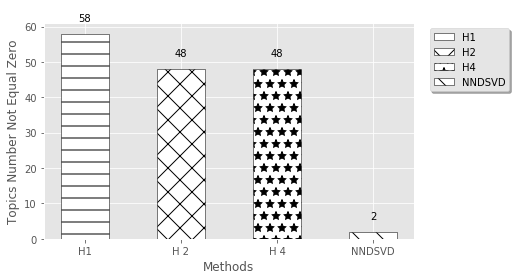

In [631]:
plot_reuls_topic("microphone_top_topic_non_zero",df_20_count_top_topic)

In [604]:
df_r_count_top_topic=count_top_topic('april.n.01', 'H1_news_group_reuters_n.csv','H2_news_group_reuters_n.csv','H4_news_group_reuters_n.csv','H_reuters_Siketleran.csv' ,5, path_database) 
df_r_count_top_topic


,H1,H2,H4,NNDSVD
0,100,19,19,10


(100,)


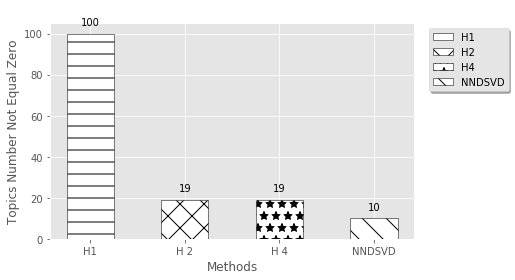

In [627]:
plot_reuls_topic("april_top_topic_non_zero",df_r_count_top_topic)

In [606]:
def plot_reuls(jobname,dataset):#,cpu_cs,cpu_spliit,gpu_cs,gpu_split):

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    # data to plot
    n_groups = 5
    job_name=jobname
    job_path=job_name+'/'
   
    F1 =dataset.loc['H1'].values
    #print(tuple(F1))
    F2 =dataset.loc['H2'].values
    F3 =dataset.loc['H4'].values
    F4 =dataset.loc['NNDSVD'].values
    

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    rects_F1 = plt.bar(index, F1, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H1',edgecolor='black', hatch=patterns[3])

    rects_F2 = plt.bar(.1+index + bar_width, F2, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H2',edgecolor='black', hatch=patterns[5])

    rects_F3 = plt.bar(.1+index + bar_width*2+.1, F3, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H4',edgecolor='black', hatch=patterns[9])
    
    rects_F4 = plt.bar(.1+index + bar_width*2+.3, F4, bar_width,
                     alpha=opacity,
                     color='W',
                     label='NNDSVD',edgecolor='black', hatch=patterns[1])


    plt.xlabel('Topics')
    plt.ylabel('Number of Terms Not Equal Zero')
    plt.title(" ")
    plt.xticks(index + bar_width, ('Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5'))
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)#frameon=False, loc='best', ncol=1)
    

    plt.tight_layout()
    autolabel(rects_F1,ax)
    autolabel(rects_F2,ax)
    autolabel(rects_F3,ax)
    autolabel(rects_F4,ax)

    #plt.show()
    plt.savefig(path_database+job_name+'.png', dpi=1200, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures


H1_20_max5.index Index(['microphone.n.01', 'circuit_breaker.n.01',
       'small_computer_system_interface.n.01', 'objective.n.02',
       'keyboard.n.01'],
      dtype='object')
microphone.n.01                         58
circuit_breaker.n.01                    58
small_computer_system_interface.n.01    58
objective.n.02                          58
keyboard.n.01                           58
dtype: int64
H2_20_max5.index Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'cursor.n.01', 'converter.n.01'],
      dtype='object')
H4_20_max5.index Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'adapter.n.02', 'cam.n.02'],
      dtype='object')
H_s_20_max5.index Index(['2', '28', '99', '37', '27'], dtype='object')


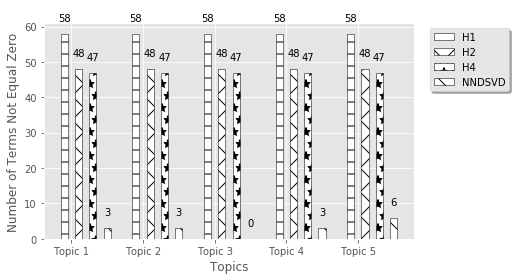

In [635]:
df=count_top_term_top_topic('microphone.n.01', 'H1_news_group_n.csv','H2_news_group_n.csv','H4_news_group_n.csv','H_20_Siketleran.csv' ,5, path_database) 
plot_reuls("microphone_top_topic_term",df[0])
#df.loc['H1'].values

In [641]:
df[3]

microphone.n.01                         9.956513
small_computer_system_interface.n.01    6.973748
circuit_breaker.n.01                    6.973748
adapter.n.02                            4.208650
cam.n.02                                4.208650
Name: microphone.n.01, dtype: float64

H1_20_max5.index Index(['april.n.01', 'wrinkle.n.01', 'maximum.n.03', 'sugar.n.01',
       'alberta.n.01'],
      dtype='object')
april.n.01      100
wrinkle.n.01    100
maximum.n.03    100
sugar.n.01      100
alberta.n.01    100
dtype: int64
H2_20_max5.index Index(['april.n.01', 'alberta.n.01', 'cooperative.n.01', 'sellers.n.01',
       'treatment.n.01'],
      dtype='object')
H4_20_max5.index Index(['april.n.01', 'july.n.01', 'january.n.01', 'february.n.01',
       'june.n.01'],
      dtype='object')
H_s_20_max5.index Index(['1', '35', '31', '57', '38'], dtype='object')


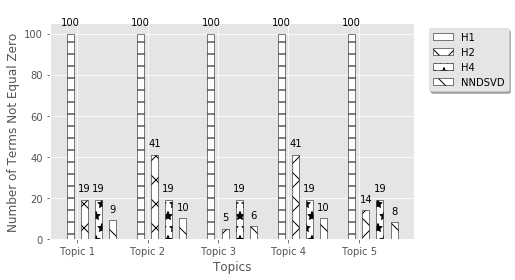

In [636]:
df2=count_top_term_top_topic('april.n.01', 'H1_news_group_reuters_n.csv','H2_news_group_reuters_n.csv','H4_news_group_reuters_n.csv','H_reuters_Siketleran.csv' ,5, path_database) 
plot_reuls("april_top_topic_term",df2[0])

In [642]:
def plot_reuls_docs(jobname,dataset):#,cpu_cs,cpu_spliit,gpu_cs,gpu_split):

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    # data to plot
    n_groups = 5
    job_name=jobname
    job_path=job_name+'/'
   
    F1 =dataset.loc['W1'].values
    #print(tuple(F1))
    F2 =dataset.loc['W2'].values
    F3 =dataset.loc['W4'].values
    F4 =dataset.loc['NNDSVD'].values
    

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    rects_F1 = plt.bar(index, F1, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H1',edgecolor='black', hatch=patterns[3])

    rects_F2 = plt.bar(.1+index + bar_width, F2, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H2',edgecolor='black', hatch=patterns[5])

    rects_F3 = plt.bar(.1+index + bar_width*2+.1, F3, bar_width,
                     alpha=opacity,
                     color='W',
                     label='H4',edgecolor='black', hatch=patterns[9])
    
    rects_F4 = plt.bar(.1+index + bar_width*2+.3, F4, bar_width,
                     alpha=opacity,
                     color='W',
                     label='NNDSVD',edgecolor='black', hatch=patterns[1])


    plt.xlabel('Topics')
    plt.ylabel('Number of Terms Not Equal Zero')
    plt.title(" ")
    plt.xticks(index + bar_width, ('Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5'))
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)#frameon=False, loc='best', ncol=1)
    

    plt.tight_layout()
    autolabel(rects_F1,ax)
    autolabel(rects_F2,ax)
    autolabel(rects_F3,ax)
    autolabel(rects_F4,ax)

    #plt.show()
    plt.savefig(path_database+job_name+'.png', dpi=1200, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures


In [643]:
def count_top_doc_topic(keyword,H1_df,W1_df,H2_df,W2_df,H4_df,W4_df,H_s_df,W_s_df,top_topic,path_database):
    index=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
    header=['W1','W2','W4','NNDSVD']
    rows=[]
    
    H1_20=read_cvs_by_pands(path_database,H1_df,index_col=0,header=0)
    H1_20_max5=H1_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print("H1_20_max5.index",H1_20_max5.index)
    W1_20=read_cvs_by_pands(path_database,W1_df,index_col=0,header=0)[H1_20_max5.index]
       
    #df_H1=pd.DataFrame(H1_20_max)
    r1=(W1_20 != 0).sum(axis=0)#columns
    #print(r1)
    rows.append(r1.values)#[0])
    
    
    H2_20=read_cvs_by_pands(path_database,H2_df,index_col=0,header=0)
    H2_20_max5=H2_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print("H2_20_max5.index",H2_20_max5.index)
    W2_20=read_cvs_by_pands(path_database,W2_df,index_col=0,header=0)[H2_20_max5.index]
        
    #df_H2=pd.DataFrame(H2_20_max)
    r2=(W2_20 != 0).sum(axis=0)#columns
    #print(r2)
    rows.append(r2.values)#[0])
    
    H4_20=read_cvs_by_pands(path_database,H4_df,index_col=0,header=0)
    H4_20_max5=H4_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    print("H4_20_max5.index",H4_20_max5.index)
    W4_20=read_cvs_by_pands(path_database,W4_df,index_col=0,header=0)[H4_20_max5.index]
    
    #df_H4=pd.DataFrame(H4_20_max)
    r4=(W4_20 != 0).sum(axis=0)#columns
    #print(r4)
    rows.append(r4.values)#[0])
    
    H_s_20=read_cvs_by_pands(path_database,H_s_df,index_col=0,header=0)
    H_s_20_max5=H_s_20.loc[keyword].sort_values(ascending=False)[:top_topic]
    W_s_20=read_cvs_by_pands(path_database,W_s_df,index_col=0,header=0)[H_s_20_max5.index]
    #df_H_s=pd.DataFrame(H_s_20_max)
    print("H_s_20_max5.index",H_s_20_max5.index)
    r_s=(W_s_20 != 0).sum(axis=0)#columns
    #print(r_s)
    rows.append(r_s.values)#[0])
    
    #rows=[]
    #rows.append(row)
    print(rows)
    df = pd.DataFrame(rows,columns=index,index=header)#'''
    return df,W1_20,W2_20,W4_20#r#H4_20[H4_20_max5.index]

H1_20_max5.index Index(['microphone.n.01', 'circuit_breaker.n.01',
       'small_computer_system_interface.n.01', 'objective.n.02',
       'keyboard.n.01'],
      dtype='object')
H2_20_max5.index Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'cursor.n.01', 'converter.n.01'],
      dtype='object')
H4_20_max5.index Index(['microphone.n.01', 'small_computer_system_interface.n.01',
       'circuit_breaker.n.01', 'adapter.n.02', 'cam.n.02'],
      dtype='object')
H_s_20_max5.index Index(['2', '28', '99', '37', '27'], dtype='object')
[array([5, 4, 3, 5, 7]), array([5, 3, 4, 4, 4]), array([24, 22, 23, 22, 22]), array([2, 1, 0, 3, 6])]


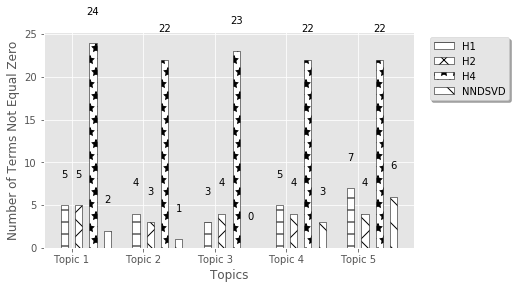

In [644]:
df_20_doc=count_top_doc_topic('microphone.n.01', 
                              'H1_news_group_n.csv',
                              'W1_news_group_n.csv',
                              'H2_news_group_n.csv',
                              'W2_news_group_n.csv',
                              'H4_news_group_n.csv',
                              'W4_news_group_n.csv',
                              'H_20_Siketleran.csv',
                              'W_20_Siketleran.csv' ,
                               5, path_database) 
df_20_doc
plot_reuls_docs("microphone_top_doc",df_20_doc[0])

H1_20_max5.index Index(['april.n.01', 'wrinkle.n.01', 'maximum.n.03', 'sugar.n.01',
       'alberta.n.01'],
      dtype='object')
H2_20_max5.index Index(['april.n.01', 'alberta.n.01', 'cooperative.n.01', 'sellers.n.01',
       'treatment.n.01'],
      dtype='object')
H4_20_max5.index Index(['april.n.01', 'july.n.01', 'january.n.01', 'february.n.01',
       'june.n.01'],
      dtype='object')
H_s_20_max5.index Index(['1', '35', '31', '57', '38'], dtype='object')
[array([26, 98, 97, 86, 74]), array([13, 45,  2, 32,  1]), array([16, 26, 45, 35, 18]), array([15, 17, 14, 16, 19])]


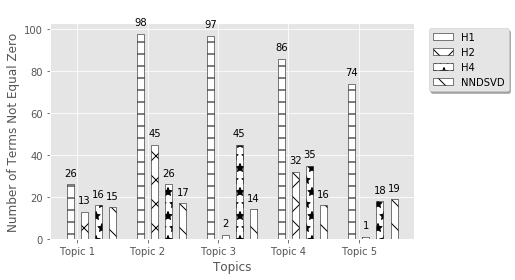

In [645]:
df_20_doc=count_top_doc_topic('april.n.01', 
                              'H1_news_group_reuters_n.csv',
                              'W1_news_group_reuters_n.csv',
                              'H2_news_group_reuters_n.csv',
                              'W2_news_group_reuters_n.csv',
                              'H4_news_group_reuters_n.csv',
                              'W4_news_group_reuters_n.csv',
                              'H_reuters_Siketleran.csv',
                              'W_reuters_Siketleran.csv' ,
                               5, path_database) 
df_20_doc
plot_reuls_docs("april_top_doc",df_20_doc[0])

In [646]:
df_20_doc[1]

,april.n.01,wrinkle.n.01,maximum.n.03,sugar.n.01,alberta.n.01
index_P,,,,,
235,0.2633,0.0009,0.0003,0.0002,0.0002
66,0.2633,0.0009,0.0003,0.0002,0.0002
299,0.2633,0.0009,0.0003,0.0002,0.0002
271,0.2633,0.0009,0.0003,0.0002,0.0002
44,0.0000,0.0040,0.0012,0.0000,0.0006
388,0.0000,0.0009,0.0003,0.0002,0.0002
89,0.0007,0.3311,0.0689,0.0227,0.0330
53,0.0000,0.0072,0.0023,0.0020,0.0011
268,0.0393,0.0079,0.0027,0.0011,0.0013


In [647]:
df_20_doc[2]

,april.n.01,alberta.n.01,cooperative.n.01,sellers.n.01,treatment.n.01
index_P,,,,,
235,0.2632,0.0000,0.0,0.0000,0.0
66,0.2632,0.0000,0.0,0.0000,0.0
299,0.2632,0.0000,0.0,0.0000,0.0
271,0.2632,0.0000,0.0,0.0000,0.0
44,0.0000,0.0001,0.0,0.0000,0.0
388,0.0000,0.0000,0.0,0.0000,0.0
89,0.0000,0.0264,0.0,0.0055,0.0
53,0.0000,0.0000,0.0,0.0000,0.0
268,0.0391,0.0006,0.0,0.0000,0.0
